In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv(r'C:\Users\Cameron\OneDrive\Documents\DCU_Data\MWBW full dataset 2377 participants_anonymised (1).csv')

list_rounded = [74,38]
list_age = [73,38]

columns = list(df.columns)

bmi = [columns[13]]

a = df[bmi].copy()
a = a.astype('float')
b = a[(a >= 10) & (a <= 40)].copy()

names_rounded = [columns[x] for x in list_rounded]
names_age = [columns[x] for x in list_age]

list_rounded_names = bmi + names_rounded
list_age_names = bmi + names_age

df_rounded = df[names_rounded].copy()
df_age = df[names_age].copy()

df_rounded = df_rounded.astype('float')
df_age = df_age.astype('float')

df_one = pd.concat([b,df_rounded], axis=1)
df_two = pd.concat([b,df_age], axis=1)

In [14]:
result_one = zscore(df_one, nan_policy='omit')
result_two = zscore(df_two, nan_policy='omit')

,new_calc_bmi,age_rounded,parent_age
0,-0.492114,-1.785879,NaN
1,-0.337777,-1.785879,0.083018
2,0.308735,-1.299117,-0.087280
3,-0.419810,-1.785879,-0.598174
4,-0.123623,-1.785879,0.083018
...,...,...,...
2372,NaN,1.134695,NaN
2373,NaN,0.647933,NaN
2374,NaN,1.134695,NaN
2375,NaN,0.647933,NaN


Text(0.5, 0, 'parent_age')

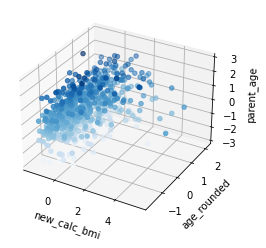

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for x, i in enumerate(list_rounded_names): 
    if x == 0:
        x_1data = result_one[i].copy()
    elif x == 1:
        y_1data = result_one[i].copy()
    elif x == 2:
        z_1data = result_one[i].copy()

ax.scatter3D(x_1data, y_1data, z_1data, c=z_1data, cmap = "Blues")
ax.set_xlabel('new_calc_bmi')
ax.set_ylabel('age_rounded')
ax.set_zlabel('parent_age')

In [13]:
X_name_list = ['age_rounded', 'parent_age']
Y_name_list = ['new_calc_bmi']

X_1 = result_one[X_name_list].copy()
Y_1 = result_one[Y_name_list].copy()

X_t, X_remain, Y_t, Y_remain = train_test_split(X_1, Y_1, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_remain, Y_remain, test_size=0.5)

X_train = np.concatenate((X_t, X_val))
Y_train = np.concatenate((Y_t, Y_val))

dataframe_X = pd.DataFrame(X_train, columns = X_name_list)
dataframe_Y = pd.DataFrame(Y_train, columns = Y_name_list)

new_X = dataframe_X[X_name_list].replace(np.nan, np.nanmean(dataframe_X[X_name_list])).copy()   
new_Y = dataframe_Y.replace(np.nan, np.nanmean(dataframe_Y)).copy()

regr = LinearRegression().fit(new_X, new_Y)

,age_rounded,parent_age
0,-1.785879,NaN
1,-1.785879,0.083018
2,-1.299117,-0.087280
3,-1.785879,-0.598174
4,-1.785879,0.083018
...,...,...
2372,1.134695,NaN
2373,0.647933,NaN
2374,1.134695,NaN
2375,0.647933,NaN


In [6]:
dataframe_X = pd.DataFrame(X_test, columns = X_name_list)
dataframe_Y = pd.DataFrame(Y_test, columns = Y_name_list)

test_X = dataframe_X[X_name_list].replace(np.nan, np.nanmean(dataframe_X[X_name_list])).copy()
test_Y = dataframe_Y.replace(np.nan, np.nanmean(dataframe_Y)).copy()

test_Y = test_Y.reset_index(drop=True)

y_hat = regr.predict(test_X)

y_hat_data = pd.DataFrame(y_hat, columns = ['predicted_bmi'])

results = pd.concat([y_hat_data,test_Y], axis=1)

mean_absolute = mean_absolute_error(test_Y, y_hat_data)

print(f'The mean absolute error is: {mean_absolute}')

r2 = r2_score(test_Y, y_hat_data)

print(f'The R2 score for the model is: {r2}')

results

The mean absolute error is: 0.5421434039320795
The R2 score for the model is: 0.08981154486399434


,predicted_bmi,new_calc_bmi
0,-0.278235,-0.180115
1,0.067244,0.256582
2,0.017872,-0.039495
3,-0.278235,-0.410732
4,0.412723,-0.146770
...,...,...
352,-0.096226,-0.964411
353,-0.105496,-0.277076
354,-0.450975,-0.735219
355,-0.105496,-0.895137


Text(0.5, 0, 'parent_age')

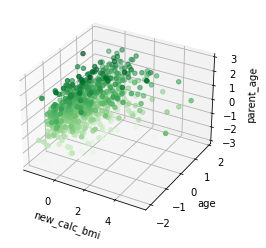

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for x, i in enumerate(list_age_names): 
    if x == 0:
        x_2data = result_two[i].copy()
    elif x == 1:
        y_2data = result_two[i].copy()
    elif x == 2:
        z_2data = result_two[i].copy()

ax.scatter3D(x_2data, y_2data, z_2data, c=z_2data, cmap = "Greens")
ax.set_xlabel('new_calc_bmi')
ax.set_ylabel('age')
ax.set_zlabel('parent_age')

In [8]:
X_name_list = ['age', 'parent_age']
Y_name_list = ['new_calc_bmi']

X_2 = result_two[X_name_list].copy()
Y_2 = result_two[Y_name_list].copy()

X_t, X_remain, Y_t, Y_remain = train_test_split(X_2, Y_2, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_remain, Y_remain, test_size=0.5)

X_train = np.concatenate((X_t, X_val))
Y_train = np.concatenate((Y_t, Y_val))

dataframe_X = pd.DataFrame(X_train, columns = X_name_list)
dataframe_Y = pd.DataFrame(Y_train, columns = Y_name_list)

new_X = dataframe_X[X_name_list].replace(np.nan, np.nanmean(dataframe_X[X_name_list])).copy()   
new_Y = dataframe_Y.replace(np.nan, np.nanmean(dataframe_Y)).copy()

regr = LinearRegression().fit(new_X, new_Y)

In [9]:
dataframe_X = pd.DataFrame(X_test, columns = X_name_list)
dataframe_Y = pd.DataFrame(Y_test, columns = Y_name_list)

test_X = dataframe_X[X_name_list].replace(np.nan, np.nanmean(dataframe_X[X_name_list])).copy()
test_Y = dataframe_Y.replace(np.nan, np.nanmean(dataframe_Y)).copy()

test_Y = test_Y.reset_index(drop=True)

y_hat = regr.predict(test_X)

y_hat_data = pd.DataFrame(y_hat, columns = ['predicted_bmi'])

results = pd.concat([y_hat_data,test_Y], axis=1)

mean_absolute = mean_absolute_error(test_Y, y_hat_data)

print(f'The mean absolute error is: {mean_absolute}')

r2 = r2_score(test_Y, y_hat_data)

print(f'The R2 score for the model is: {r2}')

results

The mean absolute error is: 0.5898551246412173
The R2 score for the model is: 0.07385626055456795


,predicted_bmi,new_calc_bmi
0,-0.193071,-0.436661
1,-0.706700,-0.123623
2,-0.021653,-0.415817
3,-0.364488,-0.460160
4,-0.021653,-1.001718
...,...,...
352,-0.535282,-0.337777
353,-0.366784,-0.718633
354,0.321182,-0.920961
355,0.149765,0.742024


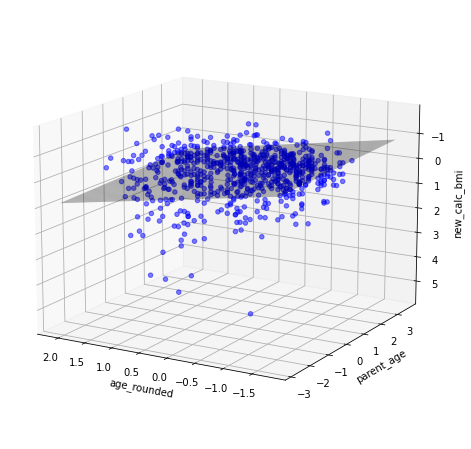

In [48]:
import statsmodels.formula.api as smf

model = smf.ols(formula='new_calc_bmi ~ age_rounded + parent_age', data=result_one)
results_formula = model.fit()

X_surf, Y_surf = np.meshgrid(np.linspace(result_one.age_rounded.min(), result_one.age_rounded.max(), 100),np.linspace(result_one.parent_age.min(), result_one.parent_age.max(), 100))
only_X = pd.DataFrame({'age_rounded': X_surf.ravel(), 'parent_age': Y_surf.ravel()})
y_fitted = results_formula.predict(exog=only_X)

y_fitted=np.array(y_fitted)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result_one['age_rounded'], result_one['parent_age'], result_one['new_calc_bmi'], c='blue', marker='o', alpha=0.5)
ax.plot_surface(X_surf, Y_surf, y_fitted.reshape(X_surf.shape), color = 'None', alpha=0.3)
ax.set_xlabel('age_rounded')
ax.set_ylabel('parent_age')
ax.set_zlabel('new_calc_bmi')
ax.view_init(-165,60)
plt.show()

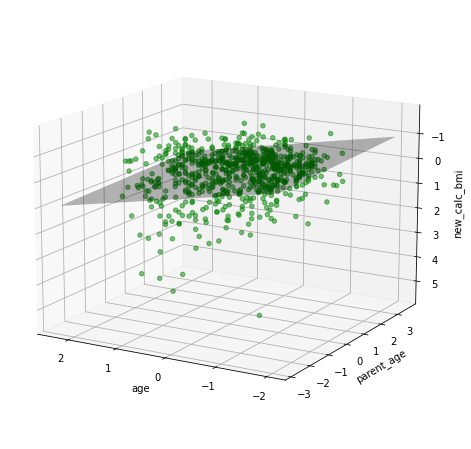

In [47]:
model = smf.ols(formula='new_calc_bmi ~ age + parent_age', data=result_two)
results_formula = model.fit()

X_surf, Y_surf = np.meshgrid(np.linspace(result_two.age.min(), result_two.age.max(), 100),np.linspace(result_two.parent_age.min(), result_two.parent_age.max(), 100))
only_X = pd.DataFrame({'age': X_surf.ravel(), 'parent_age': Y_surf.ravel()})
y_fitted = results_formula.predict(exog=only_X)

y_fitted=np.array(y_fitted)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result_two['age'], result_two['parent_age'], result_two['new_calc_bmi'], c='green', marker='o', alpha=0.5)
ax.plot_surface(X_surf, Y_surf, y_fitted.reshape(X_surf.shape), color = 'None', alpha=0.3)
ax.set_xlabel('age')
ax.set_ylabel('parent_age')
ax.set_zlabel('new_calc_bmi')
ax.view_init(-165,60)
plt.show()